# Figure 1

I have to use a seperate Jupyter notebook running on a different conda environment with an older Python version to render trees with ete3, because of [this](https://github.com/etetoolkit/ete/issues/296). 

Packages that haven't been maintained for three years with installation documentation not working with Python older than 3.5 (3.11 now) because no one funds these packages writen by grad students! I love bioformatic softwares! 

https://xkcd.com/2347/

In [1]:
import ete3
import os
import pandas as pd
import pickle
os.environ['QT_QPA_PLATFORM']='offscreen'

In [83]:
def plot_tree(tree, taxa, taxa_level='class',w=None,h=None):
    
    def expand_taxonomy(s):
        levels=['kingdom','phylum', 'class', 'order', 'family', 'genus', 'species']
        out={l:'NA' for l in levels}
        split=s.split(';')
        for l,s in zip(levels[:len(split)],split):
            s=s.strip()
            if s:
                out[l]=s
        return out

    taxa=pd.concat([taxa,taxa.apply(lambda row: expand_taxonomy(row['lca_tax_slv']),axis=1, result_type='expand')],axis=1)
        
    
    tree.ladderize(direction=0)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    gb=taxa.groupby(taxa_level)
    for (tax, group), color in zip(gb,colors[:len(gb)]):
        print(tax, len(group),color)
        for strain in group.index:
            n=tree.get_leaves_by_name(strain)[0]
            nstyle=ete3.NodeStyle()
            nstyle['fgcolor']=color
            nstyle["size"] = 15
            n.set_style(nstyle)
    ts=ete3.TreeStyle()
    ts.root_opening_factor = 1
    ts.show_leaf_name=False
    return tree.render("%%inline",tree_style=ts,w=w,h=h)
    
    

Alphaproteobacteria 42 #1f77b4
Bacilli 8 #ff7f0e
Bacteroidia 41 #2ca02c
Campylobacteria 1 #d62728
Gammaproteobacteria 109 #9467bd
NA 1 #8c564b
Verrucomicrobiae 2 #e377c2


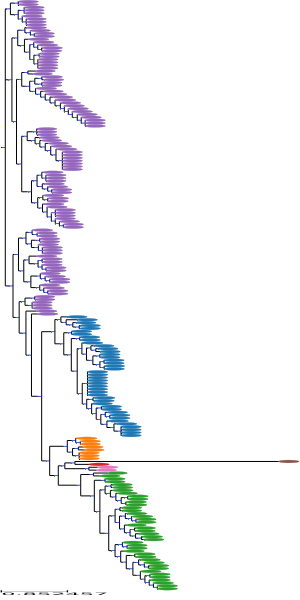

In [84]:
tree=ete3.Tree("/home/zeqianli/project/zeqian/Carbon/data/matti/matti_16S.tree")
#tree.prune(['matti_DSS-3'])
taxa=pd.read_csv("/home/zeqianli/project/zeqian/Carbon/data/matti/matti_16S.aligned.csv")[['name','lca_tax_slv']].set_index('name')
#taxa=taxa.drop(index=['matti_DSS-3'])
plot_tree(tree,taxa,w=300,h=600)


In [29]:
taxa

,lca_tax_slv,kingdom,phylum,class,order,family,genus,species
name,,,,,,,,
zeqian_sid0601,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ensifer,NA
zeqian_sid0104,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ensifer,NA
zeqian_sid0406,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ensifer,NA
zeqian_sid0306,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ensifer,NA
zeqian_sid1001,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ensifer,NA
...,...,...,...,...,...,...,...,...
zeqian_sia0103,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Aeromonadaceae,Aeromonas,NA
zeqian_sif2433,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Aeromonadaceae,Aeromonas,NA
zeqian_sif0711,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Allorhizobium-Neorhizobium-Pararhizobium-Rhizo...,NA


In [38]:
tree.get_leaves_by_name('zeqian_sif0711')

[Tree node 'zeqian_sif0711' (0x7f95506ed4f)]

## 1B: data overview

ZL, Matti, BacDive data overview; combined tree

<AxesSubplot: ylabel='strain'>

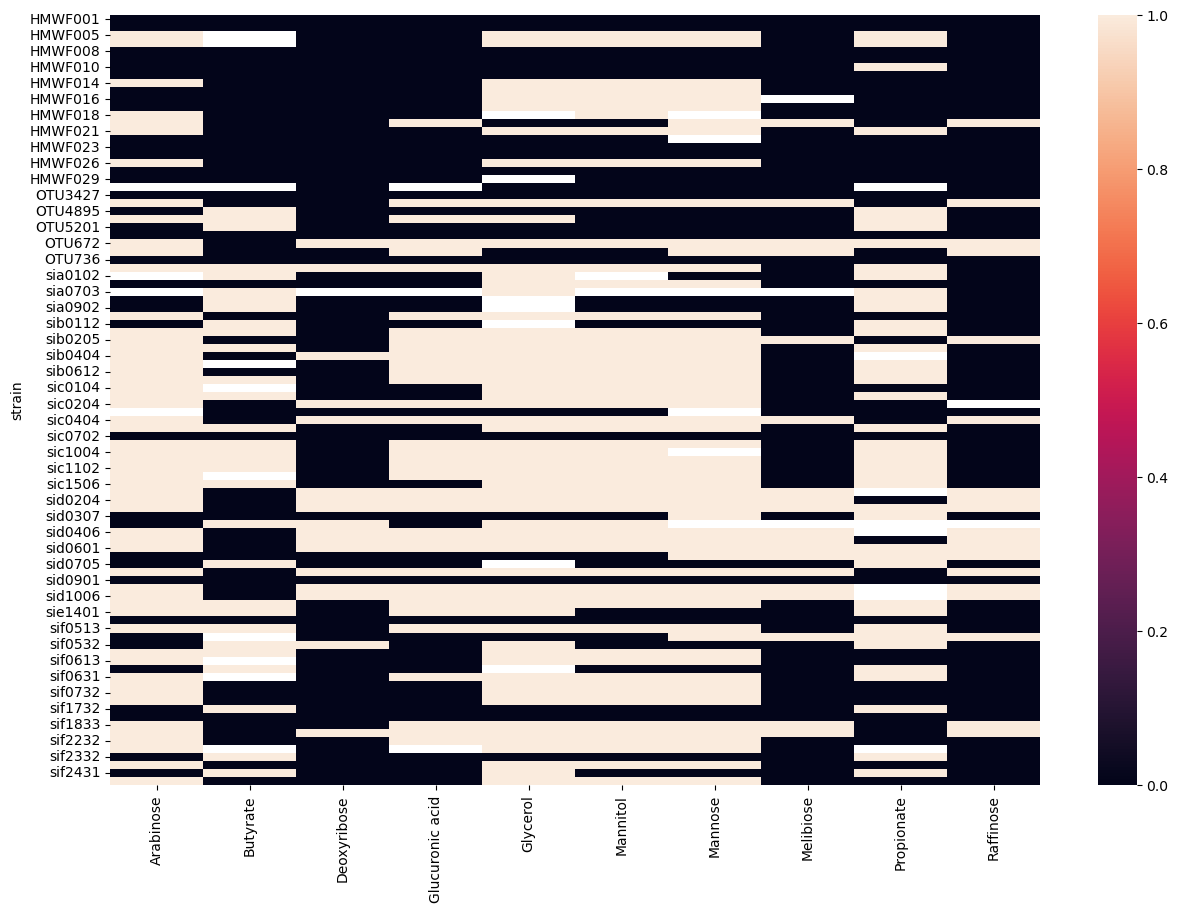

In [ ]:
sns.heatmap(zeqian['growth_data'])

<AxesSubplot: >

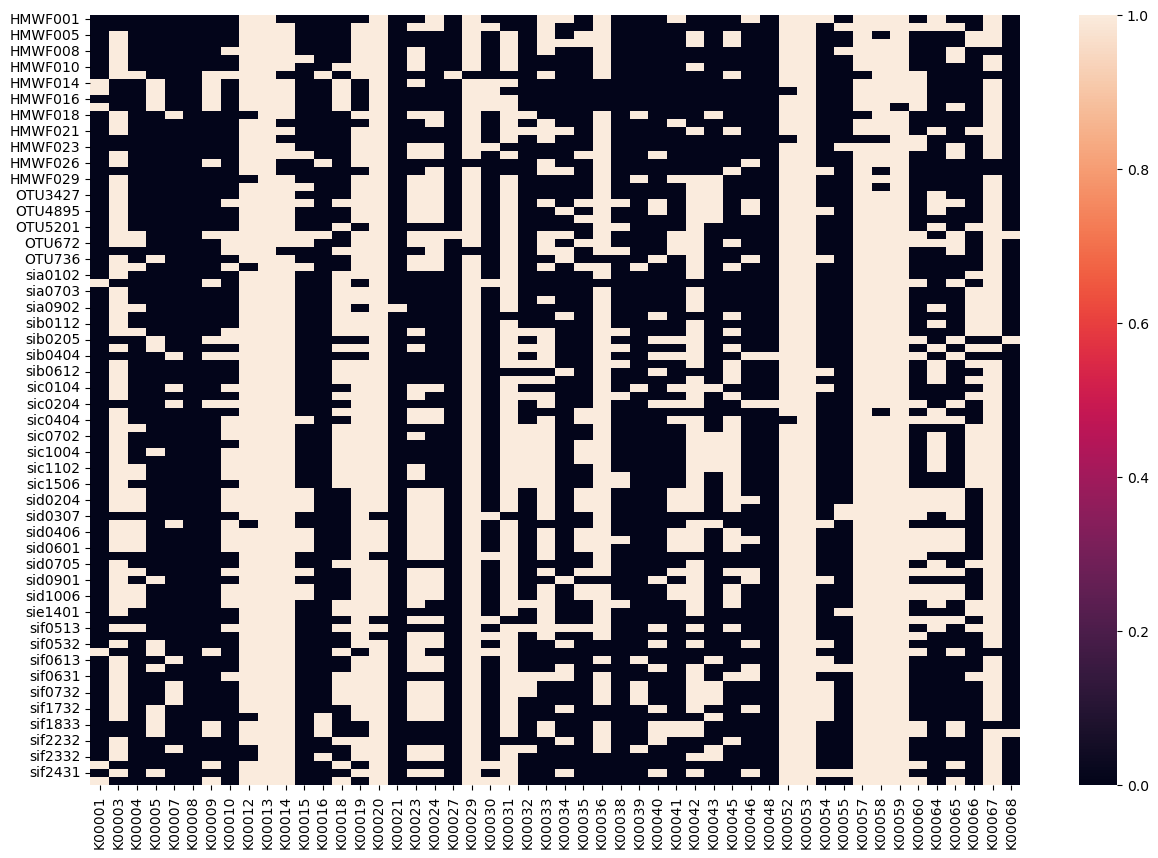

In [ ]:
sns.heatmap(zeqian['ko_data'].iloc[:,:50])

In [ ]:
zeqian['tree']

Tree node '' (0x7fb8d8a4b01)

In [ ]:
os.environ['QT_QPA_PLATFORM']='offscreen'
zeqian['tree'].render("%%inline",h=200,w=200)

TypeError: super(type, obj): obj must be an instance or subtype of type

(<Figure size 1500x2000 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Tree'}>, <AxesSubplot: >],
       dtype=object))

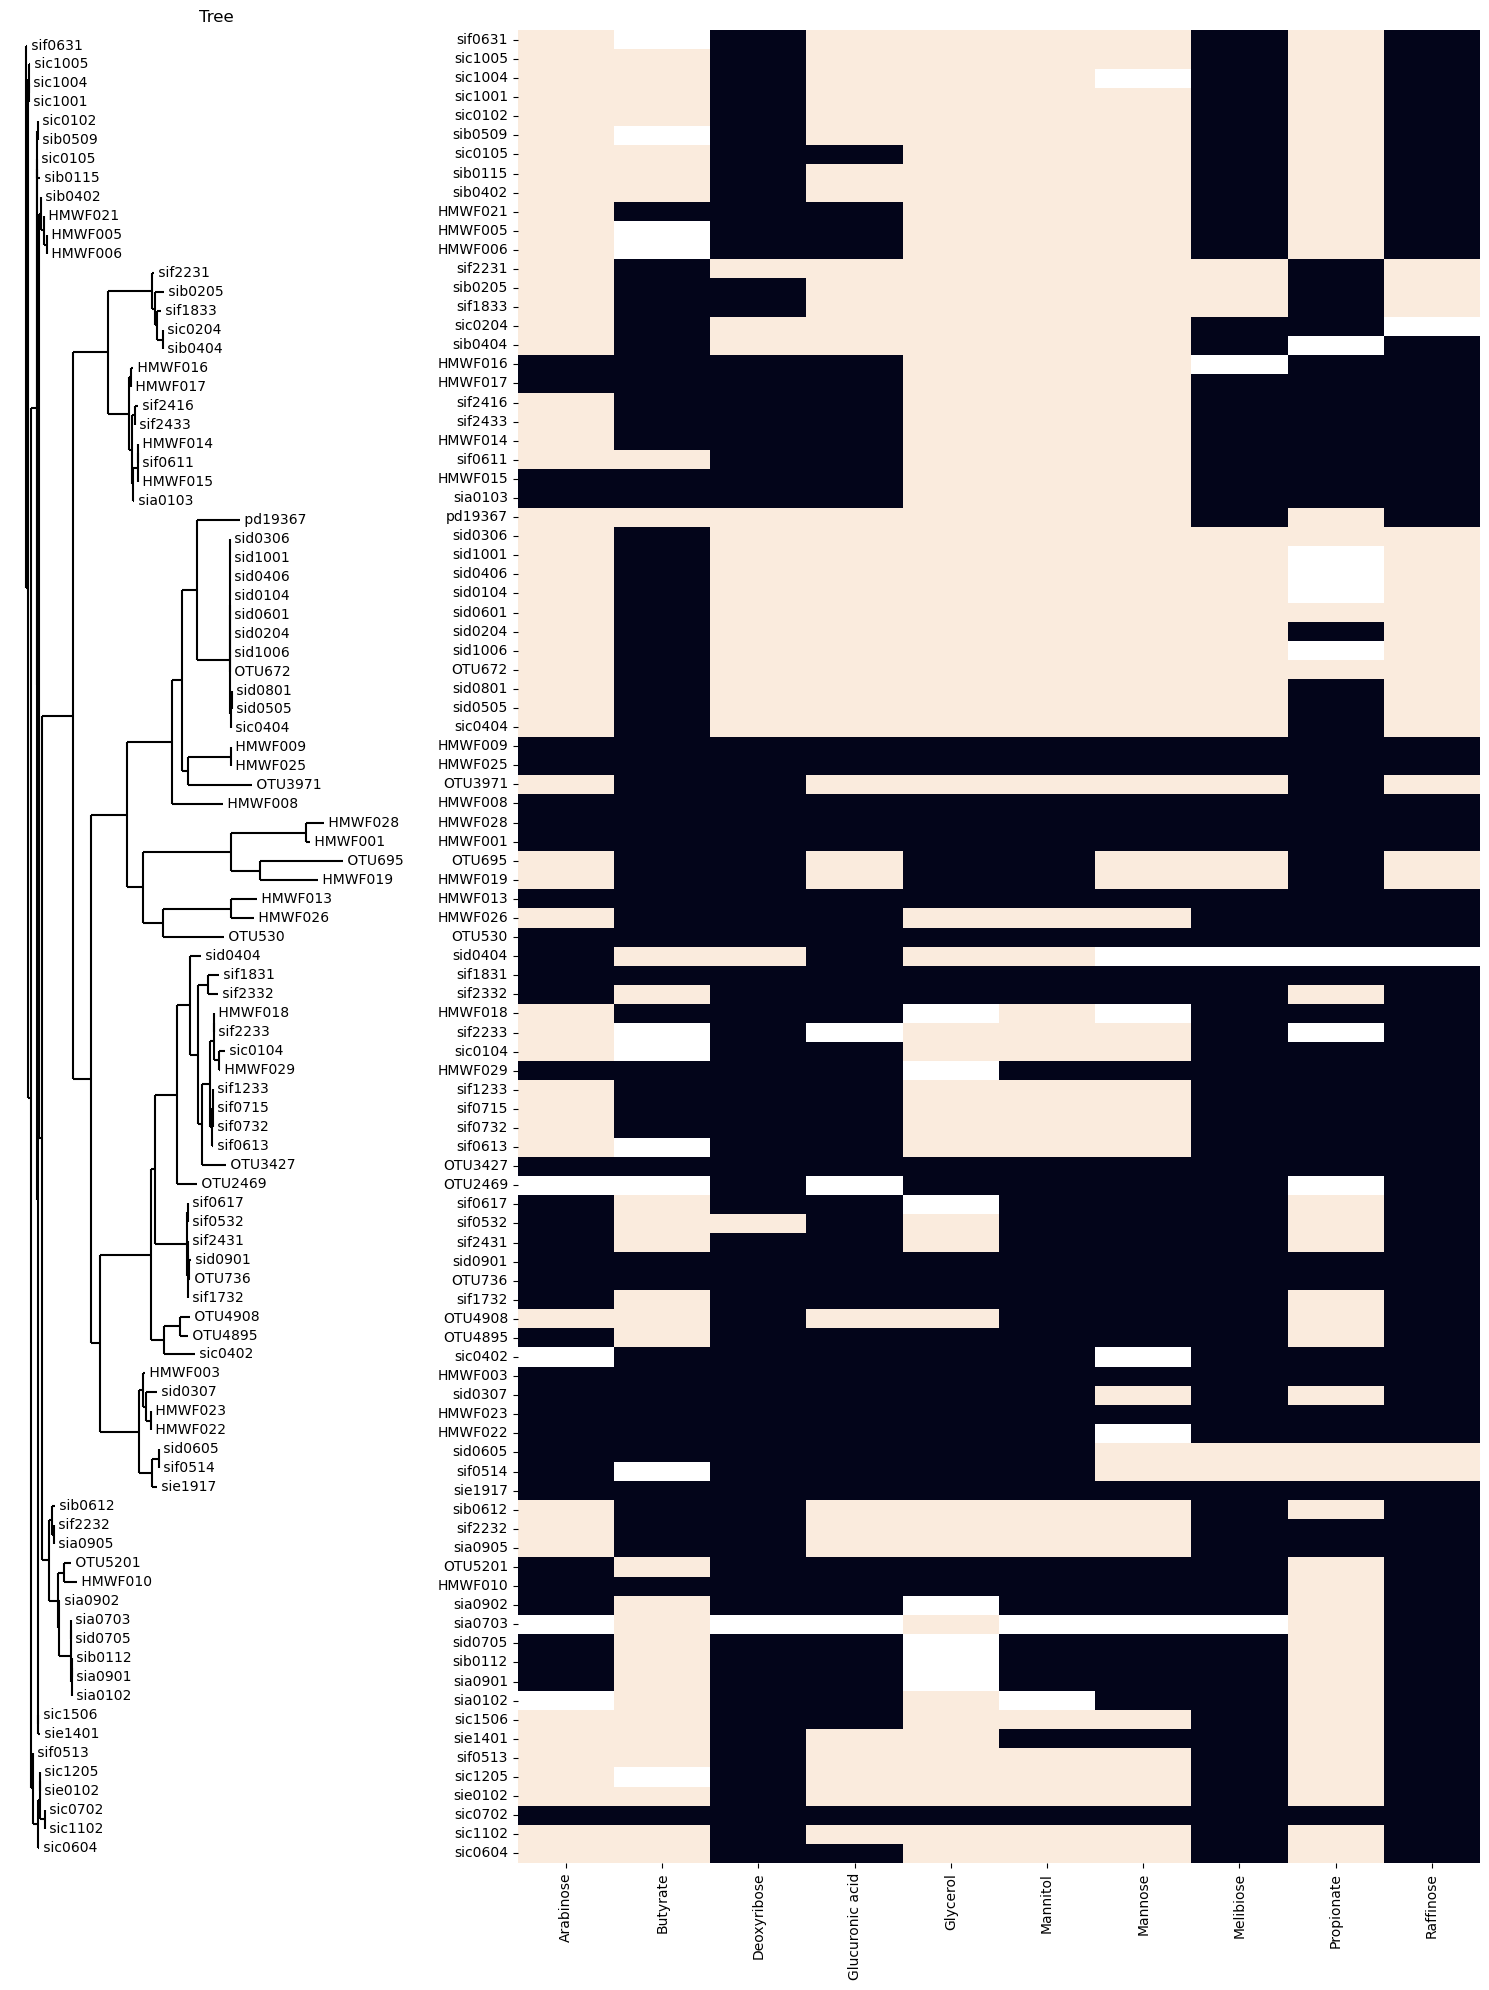

In [ ]:
# Zeqian
plot_tree_matrix(zeqian['tree'], zeqian['growth_data'].iloc[:,:10],width_ratio=(3,7),cbar=False,
                    tree_params={'show_confidence':False})

In [ ]:
matti['carbons'].shape

(118,)

(<Figure size 1500x2000 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Tree'}>, <AxesSubplot: >],
       dtype=object))

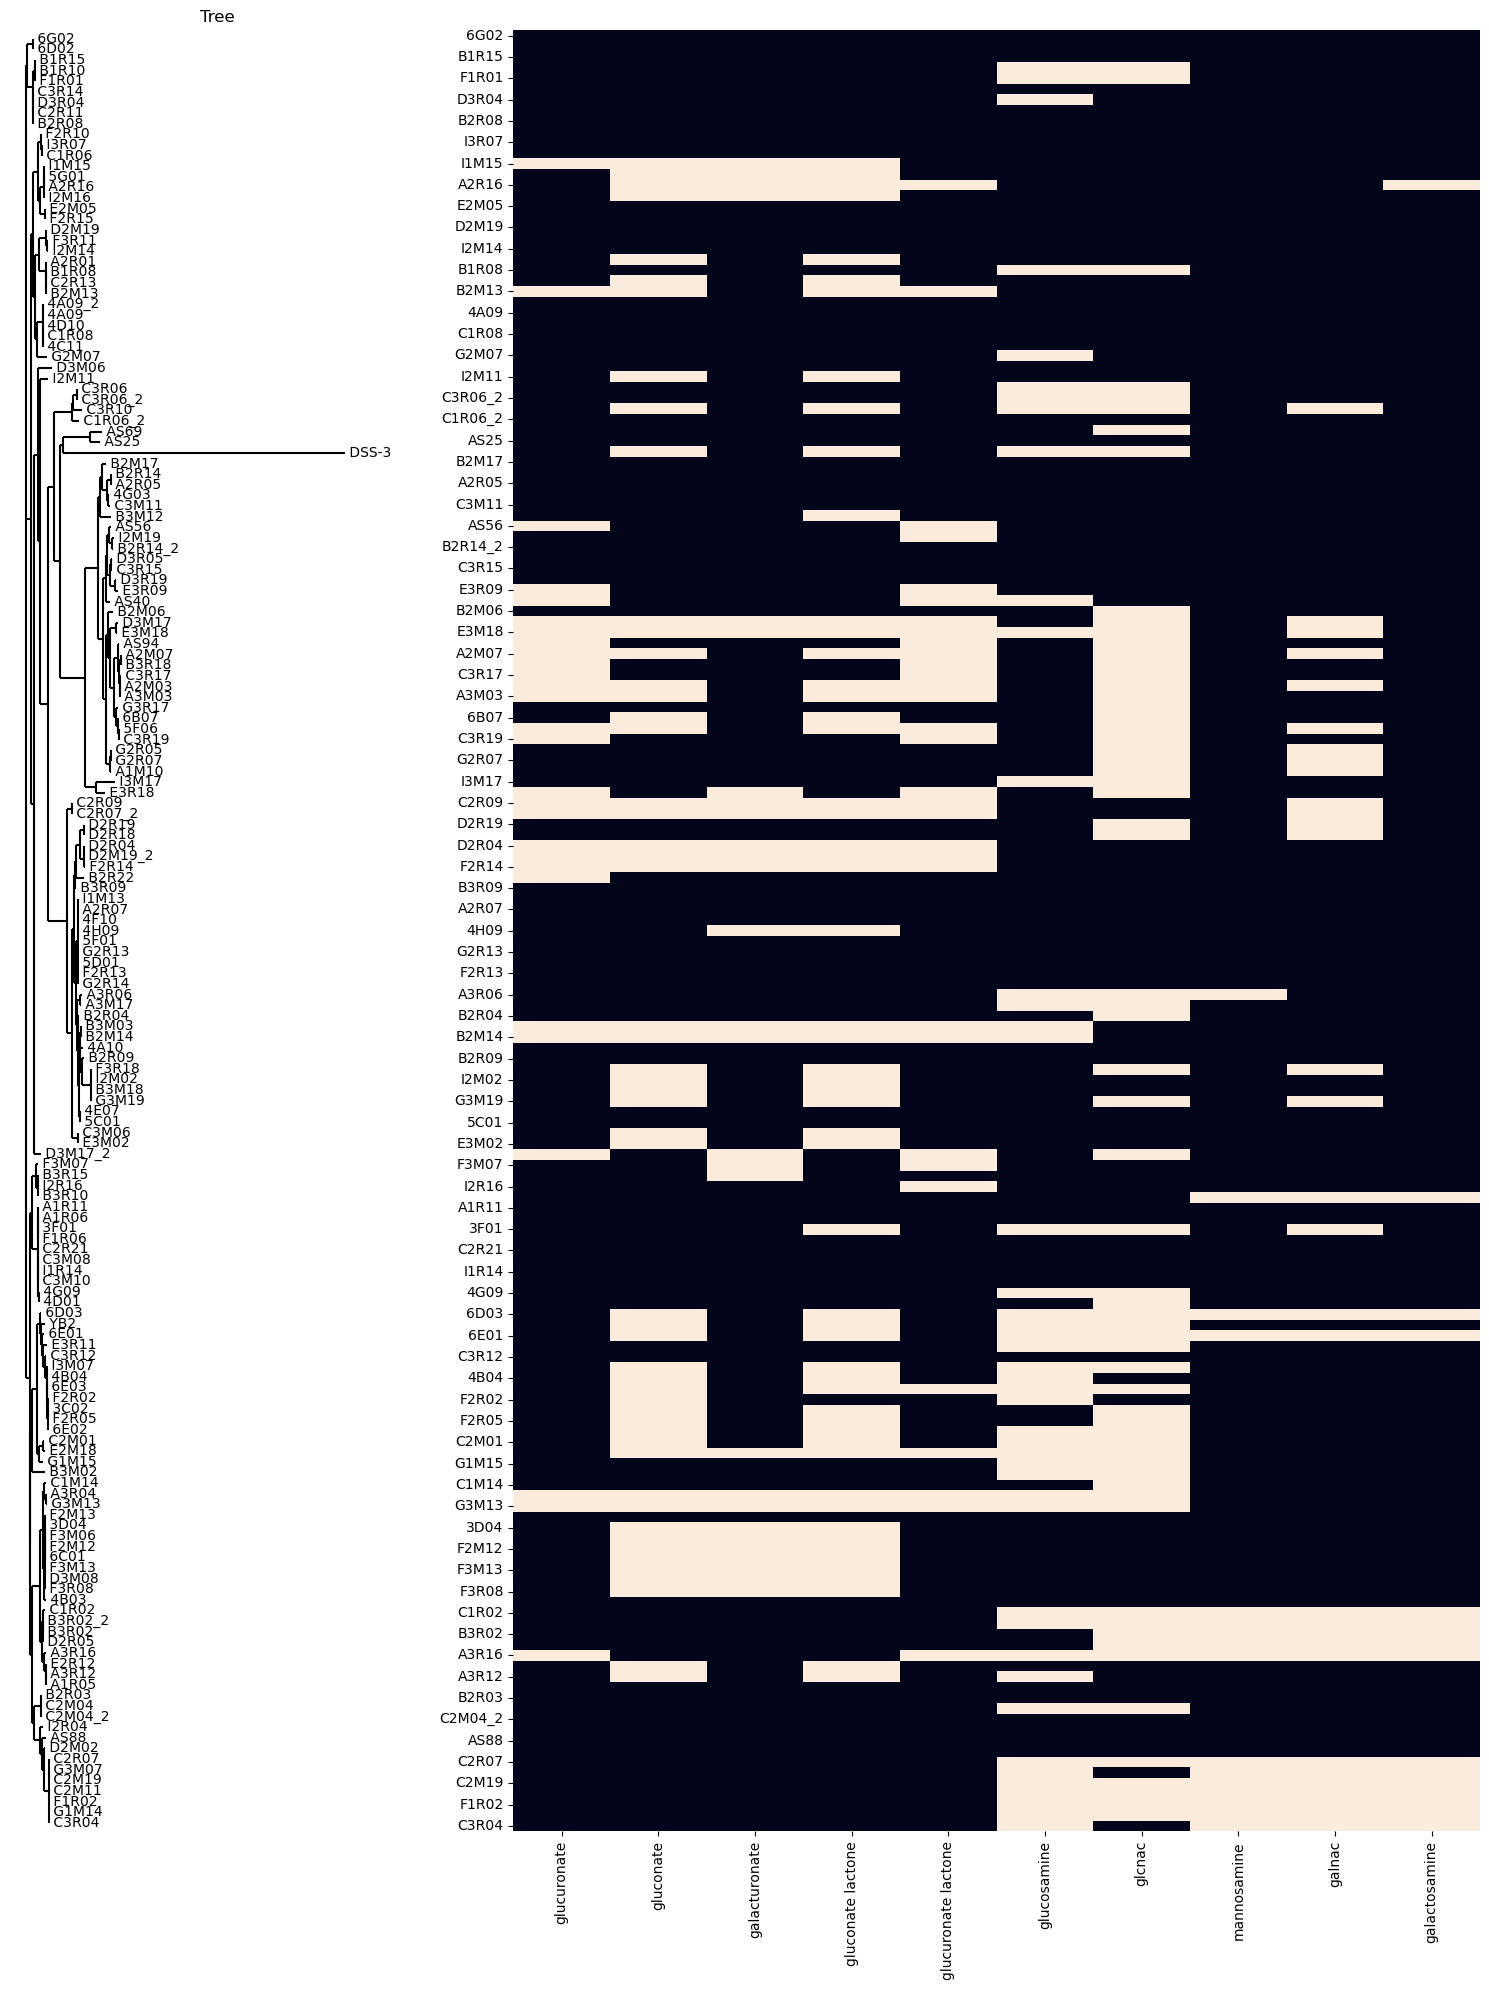

In [ ]:
# Matti
plot_tree_matrix(matti['tree'], matti['growth_data'].iloc[:,:10],width_ratio=(3,7),cbar=False,tree_params={'show_confidence':False})

In [ ]:
bacdive['growth_data'].shape

(4382, 220)

<AxesSubplot: xlabel='metabolite', ylabel='id'>

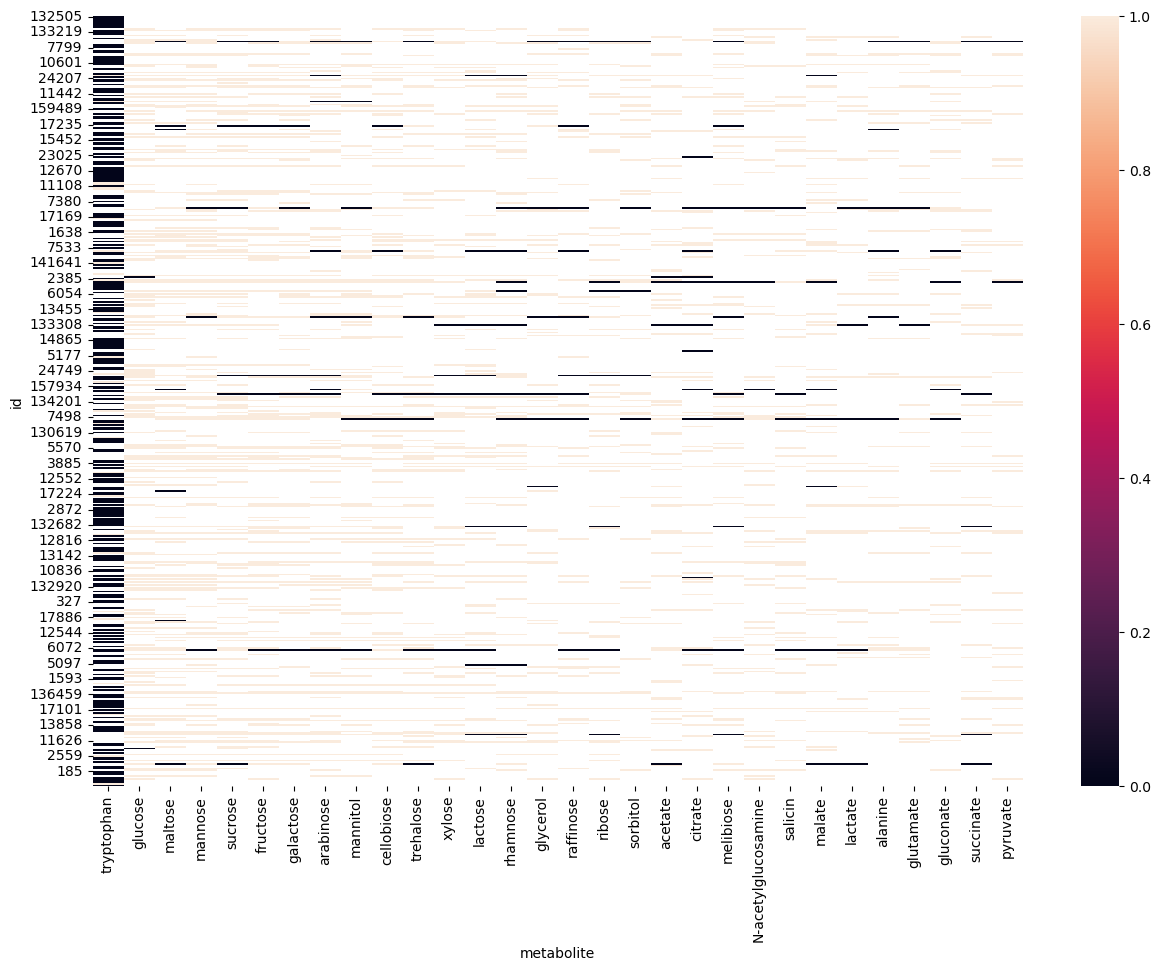

In [ ]:
# Bacdive
df=bacdive['growth_data']
df=df.iloc[:,np.argsort(df.count(axis=0).values)[::-1]]

sns.heatmap(df.iloc[np.random.choice(df.shape[0],500),:30])